# Credit Card Fraud

https://www.kaggle.com/mlg-ulb/creditcardfraud

## Objective: 
Develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve
from sklearn.metrics import auc, roc_auc_score,roc_curve, recall_score, classification_report

### EDA

In [2]:
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


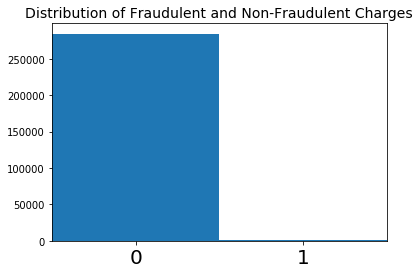

In [4]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

bins = range(3)
plt.hist(df['Class'], bins=bins)
bins_labels(bins, fontsize=20)
plt.title('Distribution of Fraudulent and Non-Fraudulent Charges', fontsize=14)
plt.show()


We can see that this is an unbalanced data set.  There are far more non-fraudulent charges in the data set than fraudulent charges.  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

There are no null values in this data set to clean up.  

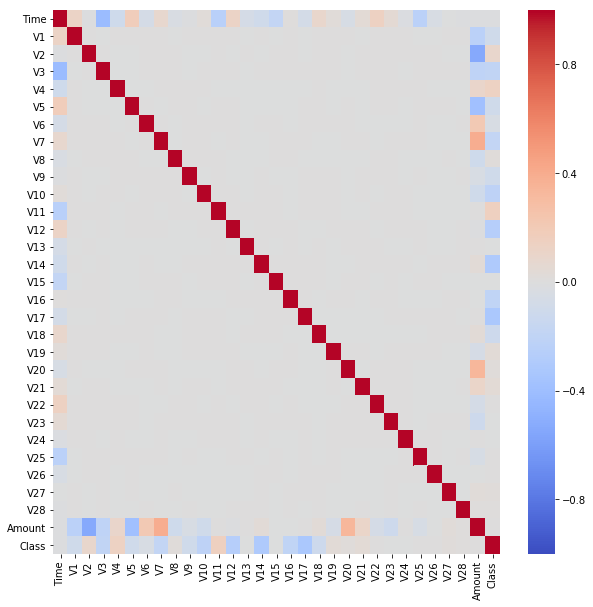

In [6]:

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

V1-V28 do not correlate highly with each other.  The data set mentions these parameters may have undergone PCA.  Amount correlates with some of the V features.  Class and time correlate with some, but not all of the features

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


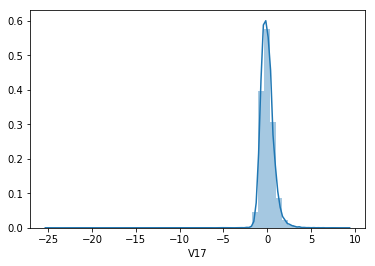

In [7]:
sns.distplot(df['V17'])

In [8]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Random Forest Classifier Score: {:.2f}'.format(clf.score(X_test, y_test)))

Random Forest Classifier Score: 1.00


In [10]:
print('Random Forest Classifier Score: {:.4f}'.format(clf.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

Random Forest Classifier Score: 0.9995
[[85270    10]
 [   36   127]]


In [11]:
y_pred_train = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))

[[199035      0]
 [     1    328]]


Try it with using class_weight = balanced

In [12]:
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print('Random Forest Classifier Score: {:.4f}'.format(clf.score(X_test, y_test)))

Random Forest Classifier Score: 0.9995


In [13]:
print('Training Confusion Matrix \n')
print(confusion_matrix(y_train, y_pred_train))
print('\n Test Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Training Confusion Matrix 

[[199035      0]
 [     1    328]]

 Test Confusion Matrix
[[85272     8]
 [   38   125]]


Model performed worse.

In [14]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

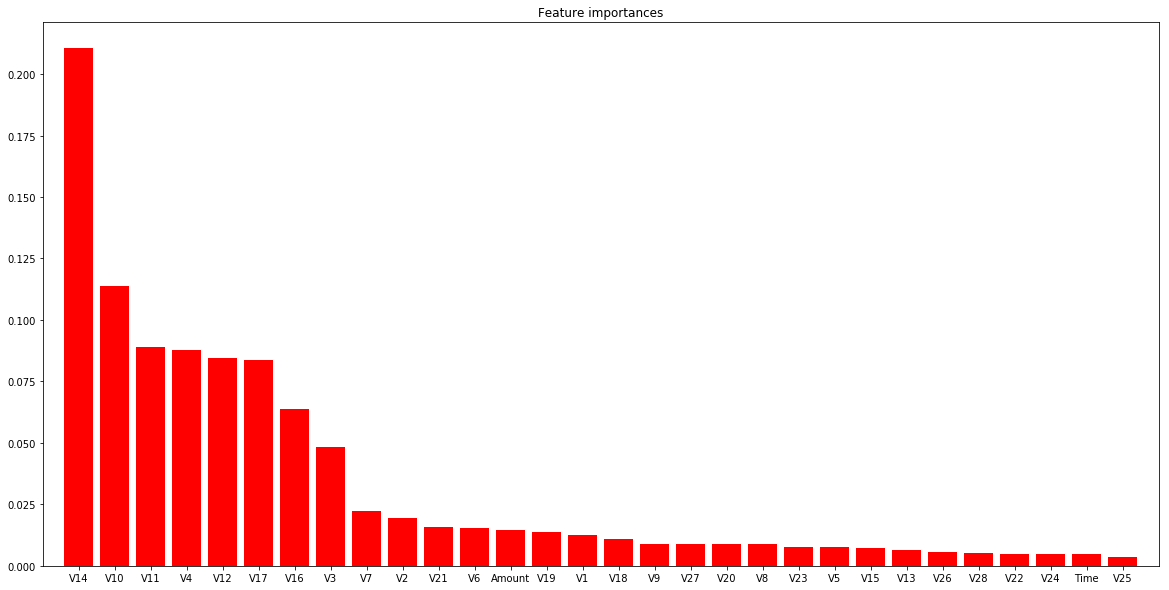

In [15]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

As suspected, a few of the features are much more important to the model than the other features.  Try the model with only a few of the features instead. Below is the model with the top 6 features

In [16]:
X_new = df[['V12', 'V17', 'V14', 'V10', 'V11', 'V16']]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)

clf_new = RandomForestClassifier(n_estimators=100)
clf_new.fit(X_train, y_train)
y_pred = clf_new.predict(X_test)
print('Random Forest Classifier Score: {:.2f}'.format(clf_new.score(X_test, y_test)))

Random Forest Classifier Score: 1.00


In [17]:
print('Random Forest Classifier Score: {:.4f}'.format(clf_new.score(X_test, y_test)))

Random Forest Classifier Score: 0.9996


In [18]:
print('Cross val score training data: {}'.format(cross_val_score(clf_new, X_train, y_train, cv=5)))
print('Cross val score test data: {}'.format(cross_val_score(clf_new, X_test, y_test, cv=5)))

Cross val score training data: [0.99934793 0.99954857 0.99947333 0.99947333 0.99939807]
Cross val score test data: [0.9995904  0.99947335 0.99947331 0.99941479 0.99947331]


## Just for fun, try with a decision tree instead

In [19]:
# Keep using the reduced feature set
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.predict(X_test)
print('Decision Tree Score {}'.format(tree.score(X_test, y_test)))


Decision Tree Score 0.9993797034280163


The decision tree model is much faster, and not a bad score.  This trade off might be worth it.

## Try Under Balancing the Data Set
This Kaggle Kernel was helpful:
https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now <br>
Used the approach in the kernel

In [24]:
# Find number of data points of fraud
# This works because a fraud data point is 1, normal is 0
num_fraud = df['Class'].sum()

# Randomly select the same number of normal records
rand_normal = df[df['Class']==0].sample(num_fraud)

# Combine data
df_under = pd.concat([df[df['Class']==1], rand_normal])

# Show the ratio
print('Percent Fraud = {}'.format(df_under['Class'].sum()/len(df_under['Class'])))

Percent Fraud = 0.5


In [33]:
X = df_under.drop('Class', axis=1)
y = df_under['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LogisticRegression(C=1, solver='liblinear')

print('Cross val score training data: {}'.format(cross_val_score(lr, X_train, y_train, cv=10)))
print('Cross val score test data: {}'.format(cross_val_score(lr, X_test, y_test, cv=10)))



Cross val score training data: [0.92753623 0.92753623 0.88405797 0.95652174 0.95652174 0.98550725
 0.89855072 1.         0.85507246 0.94029851]
Cross val score test data: [0.90322581 0.90322581 0.87096774 0.86206897 1.         0.96551724
 0.96551724 0.93103448 0.89655172 0.89655172]


In [38]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

print('Training Confusion Matrix \n')
print(confusion_matrix(y_train, y_pred_train))
print('\n Test Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report')
print(classification_report(y_test, y_pred))

Training Confusion Matrix 

[[339   6]
 [ 43 300]]

 Test Confusion Matrix
[[139   8]
 [ 16 133]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       147
           1       0.94      0.89      0.92       149

   micro avg       0.92      0.92      0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



This did correctly classifier more of the fraud instances.

In [37]:
# See if the reduced data set makes a difference
X_new = df_under[['V12', 'V17', 'V14', 'V10', 'V11', 'V16']]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

print('Training Confusion Matrix \n')
print(confusion_matrix(y_train, y_pred_train))
print('\n Test Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report')
print(classification_report(y_test, y_pred))

Training Confusion Matrix 

[[339   6]
 [ 43 300]]

 Test Confusion Matrix
[[139   8]
 [ 16 133]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       147
           1       0.94      0.89      0.92       149

   micro avg       0.92      0.92      0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



Didn't lose any on recall by using the reduced data set. Undersampling is performing better than the random forest.

## Try under sampling with the random forest

In [39]:
X_new = df_under[['V12', 'V17', 'V14', 'V10', 'V11', 'V16']]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)

clf_new = RandomForestClassifier(n_estimators=100)
clf_new.fit(X_train, y_train)
y_pred = clf_new.predict(X_test)
print('Random Forest Classifier Score: {:.2f}'.format(clf_new.score(X_test, y_test)))

print('\nRandom Forest Classification Report')
print(classification_report(y_test, y_pred))

Random Forest Classifier Score: 0.92

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       149
           1       0.96      0.86      0.91       147

   micro avg       0.92      0.92      0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



In [40]:
# Try with all the features
X = df_under.drop('Class', axis=1)
y = df_under['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_new = RandomForestClassifier(n_estimators=100)
clf_new.fit(X_train, y_train)
y_pred = clf_new.predict(X_test)
print('Random Forest Classifier Score: {:.2f}'.format(clf_new.score(X_test, y_test)))

print('\nRandom Forest Classification Report')
print(classification_report(y_test, y_pred))

Random Forest Classifier Score: 0.94

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       165
           1       0.95      0.90      0.93       131

   micro avg       0.94      0.94      0.94       296
   macro avg       0.94      0.93      0.93       296
weighted avg       0.94      0.94      0.94       296



In [41]:
print('Cross val score training data: {}'.format(cross_val_score(clf_new, X_train, y_train, cv=10)))
print('Cross val score test data: {}'.format(cross_val_score(clf_new, X_test, y_test, cv=10)))

Cross val score training data: [0.95714286 0.92753623 0.92753623 0.91304348 0.91304348 0.92753623
 0.95652174 0.95588235 0.95588235 0.91176471]
Cross val score test data: [0.90322581 0.9        1.         0.96666667 0.93333333 0.96551724
 1.         0.96551724 0.86206897 0.93103448]


## Conclusion:
These models could be improved by optimizing parameters, such as using a through using a grid search. With their current values, the Random Forest Classifier with all the features included provides the best recall score.   